# Crime and Park Data Exploration

This is a jupyter notebook where we explore the park and crime datasets after they where properly cleaned. 
The datasets that contain information about green areas in Italy are:

- _urban_green_area_city_capitals_2011_2021_density_
- _urban_green_area_city_capitals_2011_2021_m2_
- _availability_of_usable_urban_green_space_city_capitals_2011_2021_m2_per_inhabitant_
- _availability_of_usable_urban_green_space_city_capitals_2011_2021_m2_

The dataset that contain information about crimes in Italy is:

- _individuals_reported_and_arrested_or_detained_by_police_forces_2004_2022_ISTAT_

The notebook contains both exploration of the single year and evoultion in time for the green park and crime situation in Italy. 



## Python Packages

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn
import geopandas as gpd
import os

## Dataset Loading
The name of the datasets (after the cleaning script has been executed) are by default defined as in the next cell. 

<font color='red'>If you change the filenames here in the notebook, you have to re-run the **data_cleaning.py** script with the same filenames</font>


### Default dataset filenames

In [2]:
urban_green_availability_m2_filename = "availability_of_usable_urban_green_space_city_capitals_2011_2021_m2.csv"
urban_green_availability_m2_per_inhabitant_filename = "availability_of_usable_urban_green_space_city_capitals_2011_2021_m2_per_inhabitant.csv"
urban_green_area_m2_filename = "urban_green_area_city_capitals_2011_2021_m2.csv"
urban_green_area_density_filename = "urban_green_area_city_capitals_2011_2021_density.csv"
crime_filename = "individuals_reported_and_arrested_or_detained_by_police_forces_2004_2022_ISTAT.csv"

### From csv to pandas dataframe

In [3]:
# path where are stored the pre-processed park and crime datasets
path_in =  os.path.join(os.path.abspath(""), os.path.join("..", "data/parks_and_crime/clean"))

crime_df = pd.read_csv(os.path.join(path_in, crime_filename))
urban_green_availability_m2_df = pd.read_csv(os.path.join(path_in, urban_green_availability_m2_filename))
urban_green_availability_m2_per_inhabitant_df = pd.read_csv(os.path.join(path_in, urban_green_availability_m2_per_inhabitant_filename))
urban_green_area_m2_df = pd.read_csv(os.path.join(path_in, urban_green_area_m2_filename))
urban_green_area_density_df = pd.read_csv(os.path.join(path_in, urban_green_area_density_filename))


## Italy shapely files

These files contain the geometric information of all the italian provincies. 
Using these information it is possible to plot a map of Italy with the correct borders

In [4]:
# year that will be selected for the visualization
year = "2021"

# path of the shapley files
path_shp = os.path.join(os.path.abspath(""), os.path.join("..", "data/italy_provinces_shp_files"))

# shp file name
shp_file = os.path.join(path_shp, os.path.join(year, "Prov"+year+"_g_WGS84.shp"))
print(shp_file)

# load the shp file
gdf = gpd.read_file(shp_file)
print(gdf.head())

/workspaces/italian-green-vs-crime-analysis/notebook/../data/italy_provinces_shp_files/2021/Prov2021_g_WGS84.shp
   COD_RIP  COD_REG  COD_PROV  COD_CM  COD_UTS  DEN_PROV  DEN_CM   DEN_UTS  \
0        1        1         1     201      201         -  Torino    Torino   
1        1        1         2       0        2  Vercelli       -  Vercelli   
2        1        1         3       0        3    Novara       -    Novara   
3        1        1         4       0        4     Cuneo       -     Cuneo   
4        1        1         5       0        5      Asti       -      Asti   

  SIGLA             TIPO_UTS     Shape_Leng    Shape_Area  \
0    TO  Citta metropolitana  539249.811270  6.828137e+09   
1    VC            Provincia  418078.067821  2.082097e+09   
2    NO            Provincia  250242.112077  1.341318e+09   
3    CN            Provincia  490111.881318  6.898443e+09   
4    AT            Provincia  315563.261771  1.508947e+09   

                                            geometr

## Parks dataset exploration

### Selecting the park data by year

In [5]:
urban_green_availability_m2_df_select = urban_green_availability_m2_df[["cities", year]]
urban_green_availability_m2_per_inhabitant_df_select = urban_green_availability_m2_per_inhabitant_df[["cities", year]]
urban_green_area_m2_df_select = urban_green_area_m2_df[["cities", year]]
urban_green_area_density_df_select = urban_green_area_density_df[["cities", year]]

### Merging the park data with the shp data

In [6]:
# urban_green_availability_m2 dataset
if(year == "2011" or year == "2012" or year == "2013" or year == "2014"):
    urban_green_availability_m2_gdf = gdf.merge(urban_green_availability_m2_df_select, left_on = "DEN_PROV", right_on = "cities")
else:
    urban_green_availability_m2_gdf_temp1 = gdf.merge(urban_green_availability_m2_df_select, left_on = "DEN_PROV", right_on = "cities")
    urban_green_availability_m2_gdf_temp2 = gdf.merge(urban_green_availability_m2_df_select, left_on = "DEN_CM", right_on = "cities")
    urban_green_availability_m2_gdf = pd.concat([urban_green_availability_m2_gdf_temp1, urban_green_availability_m2_gdf_temp2])

# urban_green_availability_m2_per_inhabitant dataset
if(year == "2011" or year == "2012" or year == "2013" or year == "2014"):
    urban_green_availability_m2_per_inhabitant_gdf = gdf.merge(urban_green_availability_m2_per_inhabitant_df_select, left_on = "DEN_PROV", right_on = "cities")
else:
    urban_green_availability_m2_per_inhabitant_gdf_temp1 = gdf.merge(urban_green_availability_m2_per_inhabitant_df_select, left_on = "DEN_PROV", right_on = "cities")
    urban_green_availability_m2_per_inhabitant_gdf_temp2 = gdf.merge(urban_green_availability_m2_per_inhabitant_df_select, left_on = "DEN_CM", right_on = "cities")
    urban_green_availability_m2_per_inhabitant_gdf = pd.concat([urban_green_availability_m2_per_inhabitant_gdf_temp1, urban_green_availability_m2_per_inhabitant_gdf_temp2])

# urban_green_area_m2 dataset
if(year == "2011" or year == "2012" or year == "2013" or year == "2014"):
    urban_green_area_m2_gdf = gdf.merge(urban_green_area_m2_df_select, left_on = "DEN_PROV", right_on = "cities")
else:
    urban_green_area_m2_gdf_temp1 = gdf.merge(urban_green_area_m2_df_select, left_on = "DEN_PROV", right_on = "cities")
    urban_green_area_m2_gdf_temp2 = gdf.merge(urban_green_area_m2_df_select, left_on = "DEN_CM", right_on = "cities")
    urban_green_area_m2_gdf = pd.concat([urban_green_area_m2_gdf_temp1, urban_green_area_m2_gdf_temp2])

# urban_green_area_density dataset
if(year == "2011" or year == "2012" or year == "2013" or year == "2014"):
    urban_green_area_density_gdf = gdf.merge(urban_green_area_density_df_select, left_on = "DEN_PROV", right_on = "cities")
else:
    urban_green_area_density_gdf_temp1 = gdf.merge(urban_green_area_density_df_select, left_on = "DEN_PROV", right_on = "cities")
    urban_green_area_density_gdf_temp2 = gdf.merge(urban_green_area_density_df_select, left_on = "DEN_CM", right_on = "cities")
    urban_green_area_density_gdf = pd.concat([urban_green_area_density_gdf_temp1, urban_green_area_density_gdf_temp2])

### Plot of the park distribution over Italy

[]

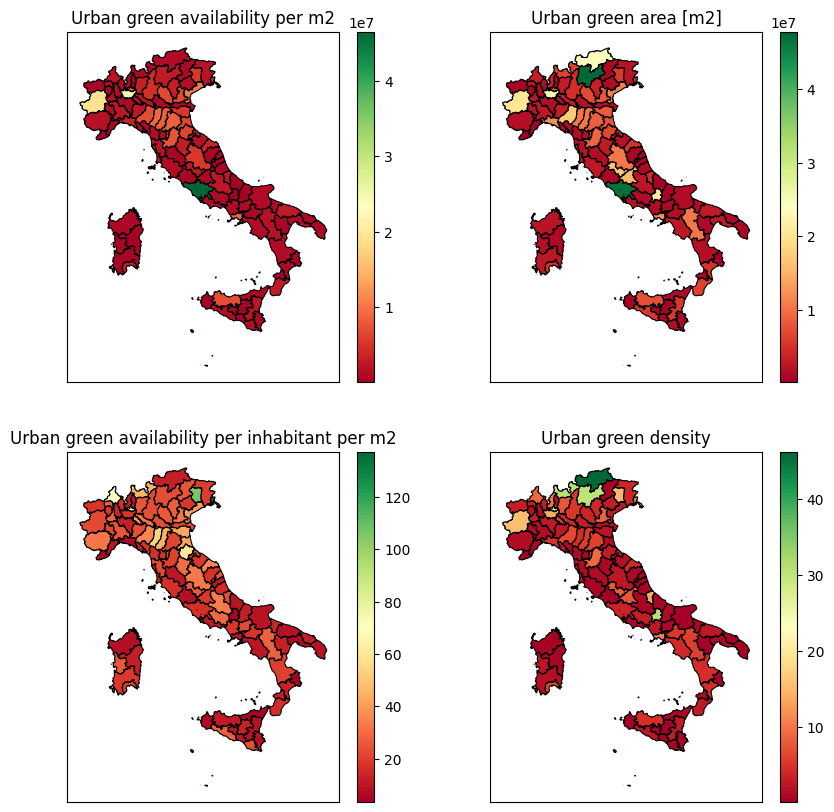

In [7]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

urban_green_availability_m2_gdf.plot(column=year, cmap='RdYlGn', linewidth=0.8, ax=ax[0,0], edgecolor='k', legend=True)
urban_green_area_m2_gdf.plot(column=year, cmap='RdYlGn', linewidth=0.8, ax=ax[0,1], edgecolor='k', legend=True)
urban_green_availability_m2_per_inhabitant_gdf.plot(column=year, cmap='RdYlGn', linewidth=0.8, ax=ax[1,0], edgecolor='k', legend=True)
urban_green_area_density_gdf.plot(column=year, cmap='RdYlGn', linewidth=0.8, ax=ax[1,1], edgecolor='k', legend=True)

ax[0,0].set_title("Urban green availability per m2")
ax[0,1].set_title("Urban green area [m2]")
ax[1,0].set_title("Urban green availability per inhabitant per m2")
ax[1,1].set_title("Urban green density")

ax[0,0].set_xticks([])
ax[0,1].set_xticks([])
ax[1,0].set_xticks([])
ax[1,1].set_xticks([])

ax[0,0].set_yticks([])
ax[0,1].set_yticks([])
ax[1,0].set_yticks([])
ax[1,1].set_yticks([])


/tmp/ipykernel_1785/2749951047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban_green_area_density_df_select[year] = urban_green_area_density_df_select[year].astype(float)


Text(0.5, 1.0, 'Urban green density')

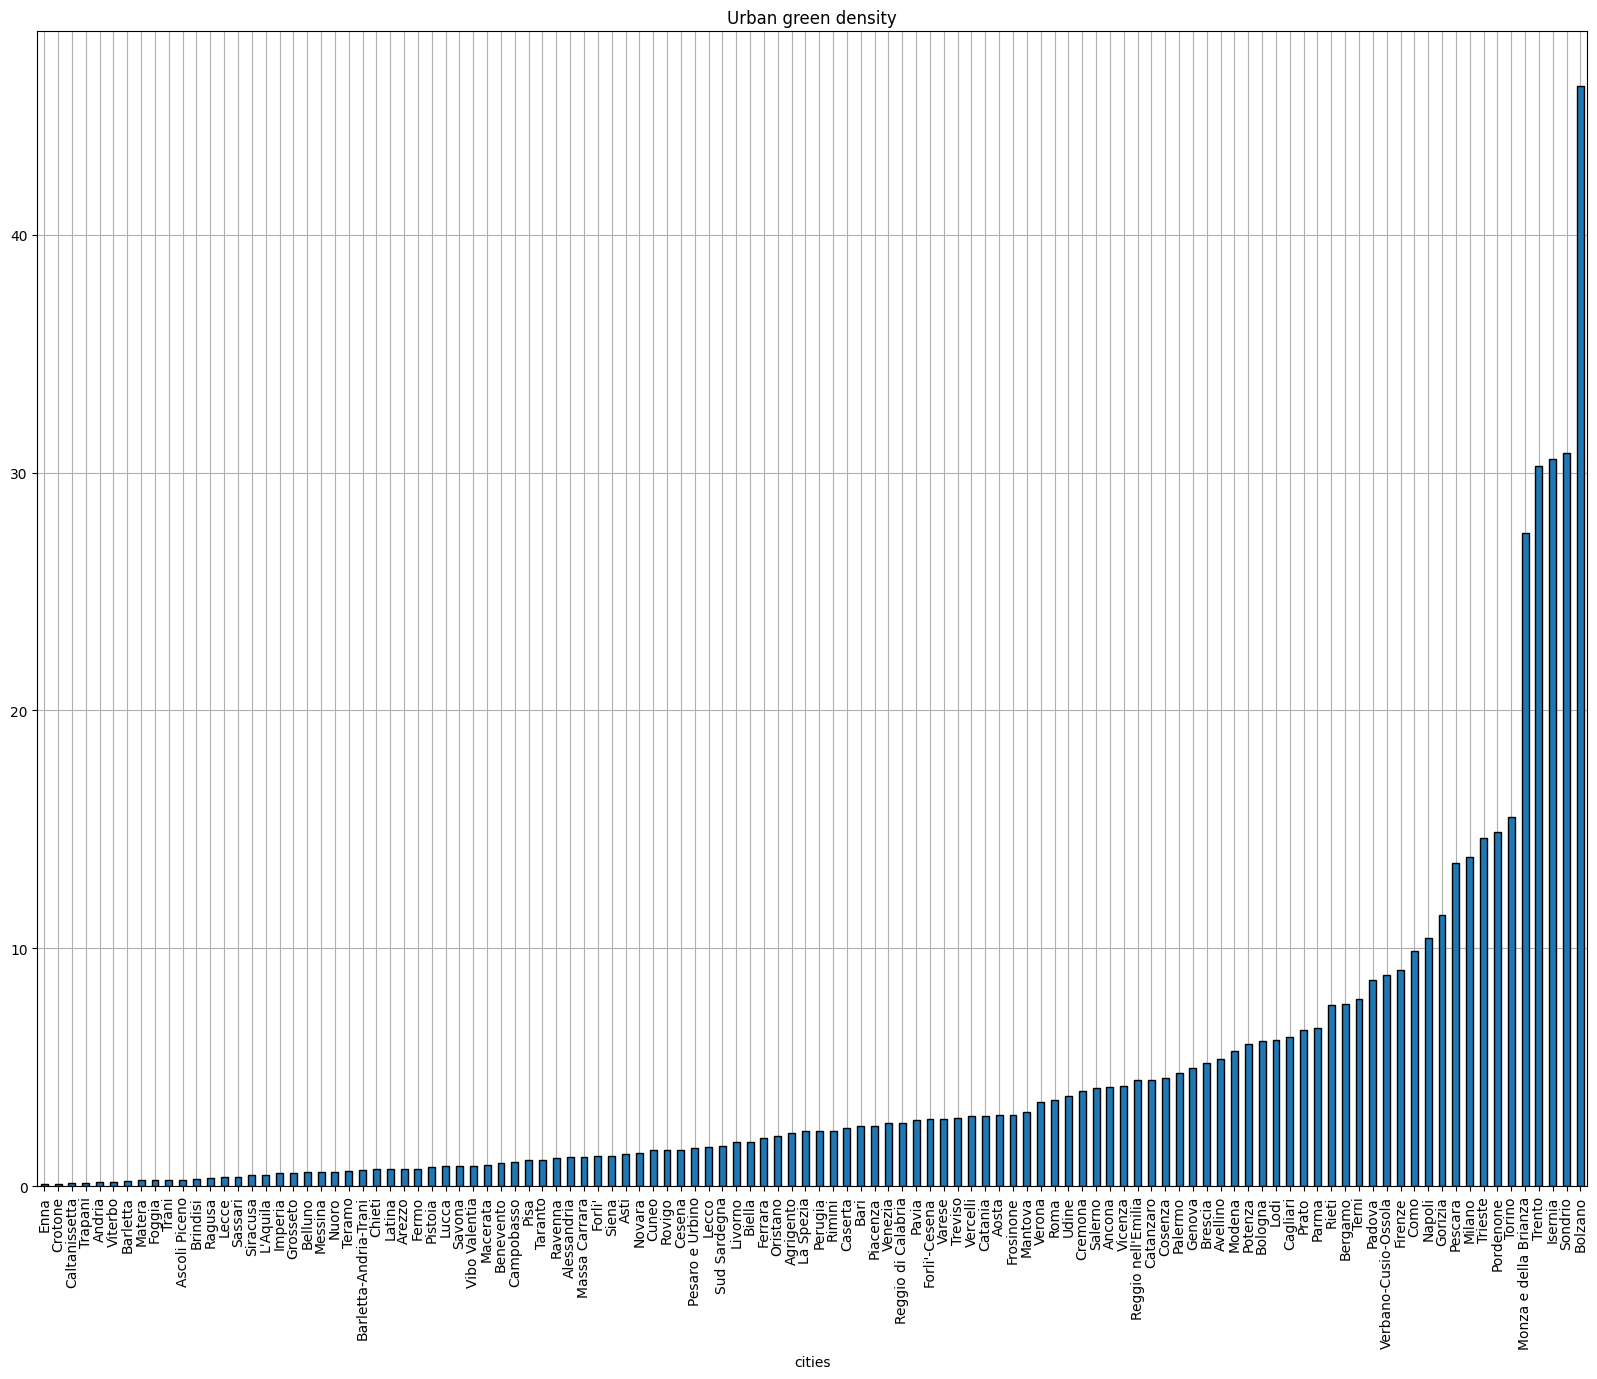

In [8]:
urban_green_area_density_df_select[year] = urban_green_area_density_df_select[year].astype(float)

fig, ax = plt.subplots(figsize=(20,15))
urban_green_area_density_df_select.sort_values(str(year)).plot.bar(x="cities", y=str(year), 
                                                                   edgecolor="k", 
                                                                   ax=ax, grid=True, legend=False)

ax.set_axisbelow(True)
ax.set_title("Urban green density")



/tmp/ipykernel_1785/2648760893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban_green_availability_m2_per_inhabitant_df_select[year] = urban_green_availability_m2_per_inhabitant_df_select[year].astype(float)


Text(0, 0.5, 'Green availability per inhabitant per m2')

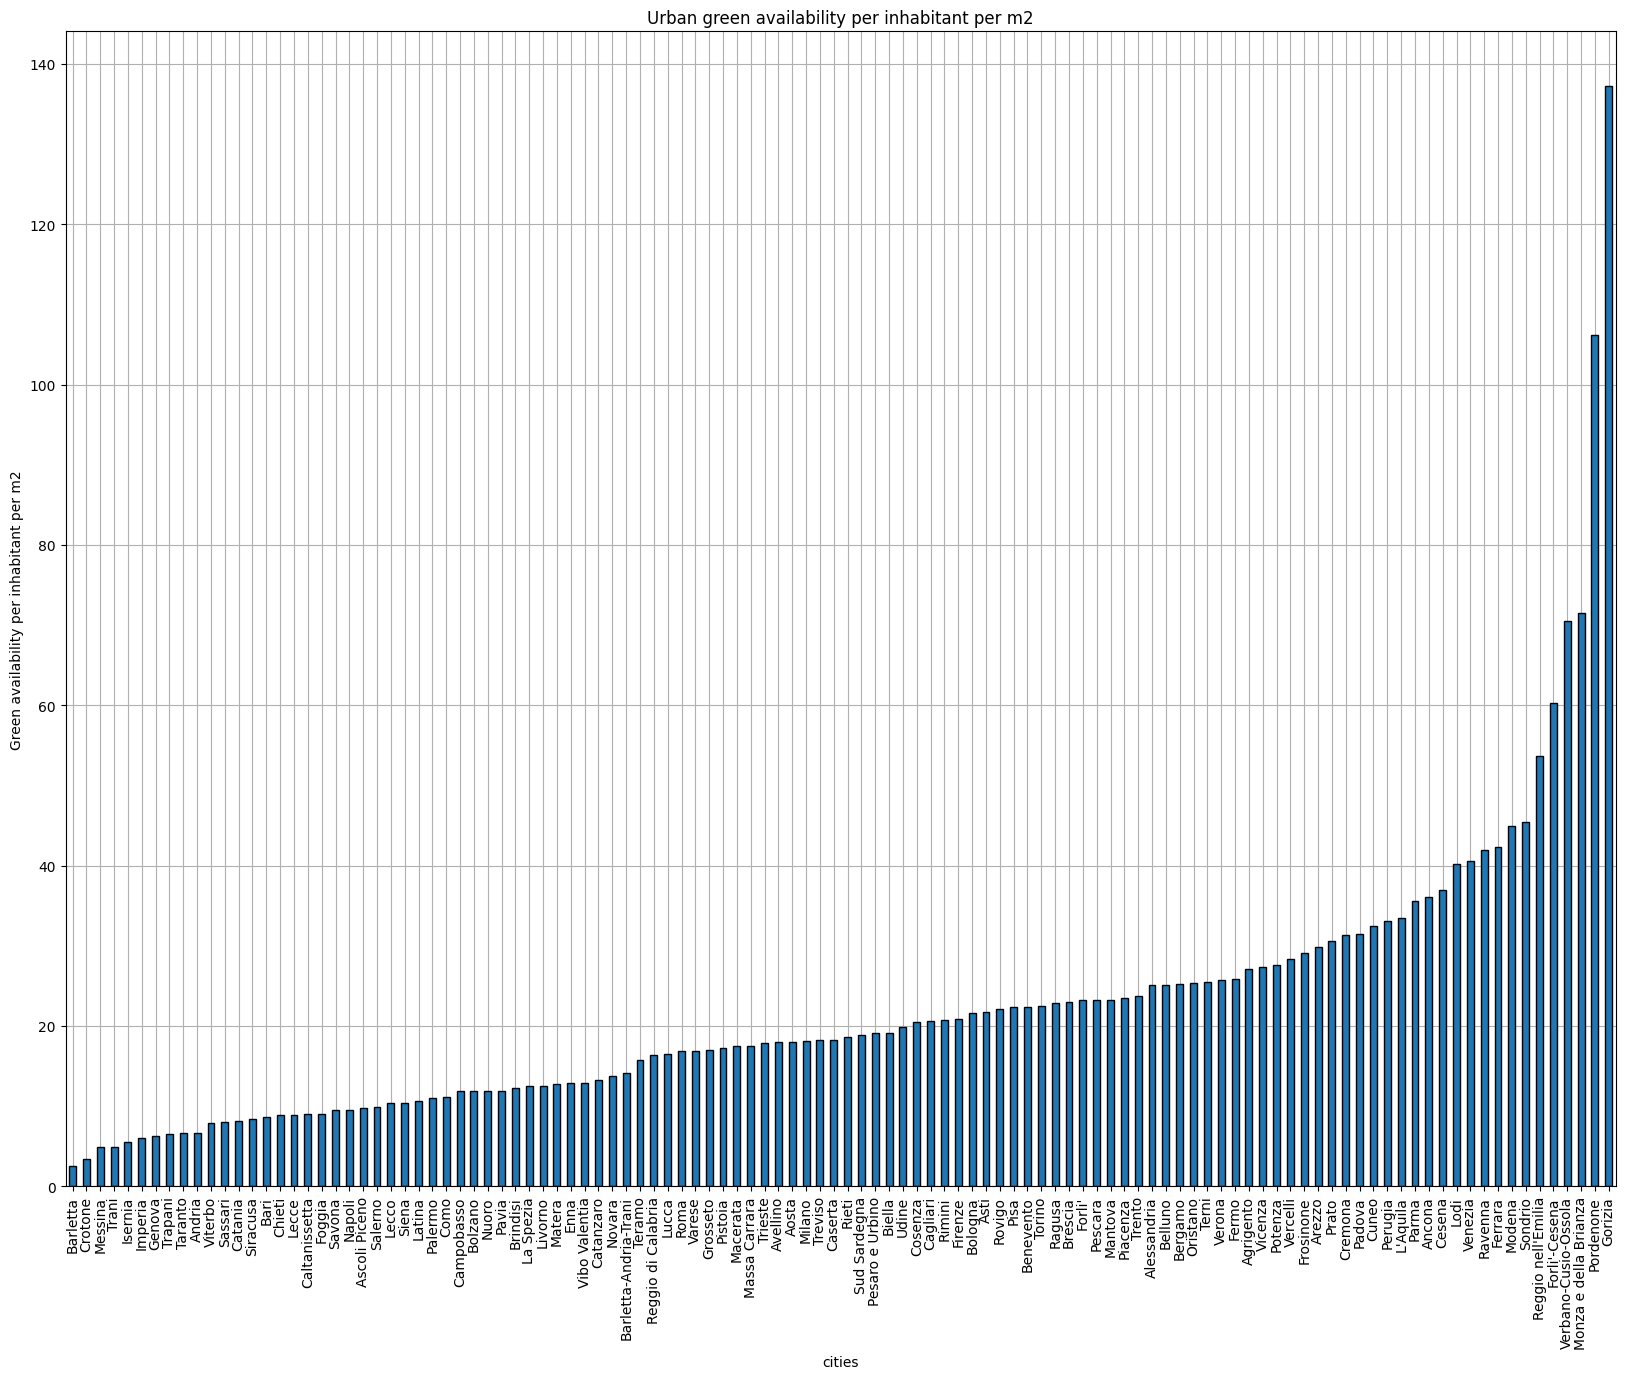

In [9]:
urban_green_availability_m2_per_inhabitant_df_select[year] = urban_green_availability_m2_per_inhabitant_df_select[year].astype(float)

fig, ax = plt.subplots(figsize=(20,15))
urban_green_availability_m2_per_inhabitant_df_select.sort_values(str(year)).plot.bar(x="cities", y=str(year), 
                                                                      edgecolor="k", 
                                                                      ax=ax, grid=True, legend=False)

ax.set_axisbelow(True)
ax.set_title("Urban green availability per inhabitant per m2")
ax.set_ylabel("Green availability per inhabitant per m2")

/tmp/ipykernel_1785/2909591277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban_green_availability_m2_df_select[year] = urban_green_availability_m2_df_select[year].astype(float)


Text(0, 0.5, 'Green availability per m2')

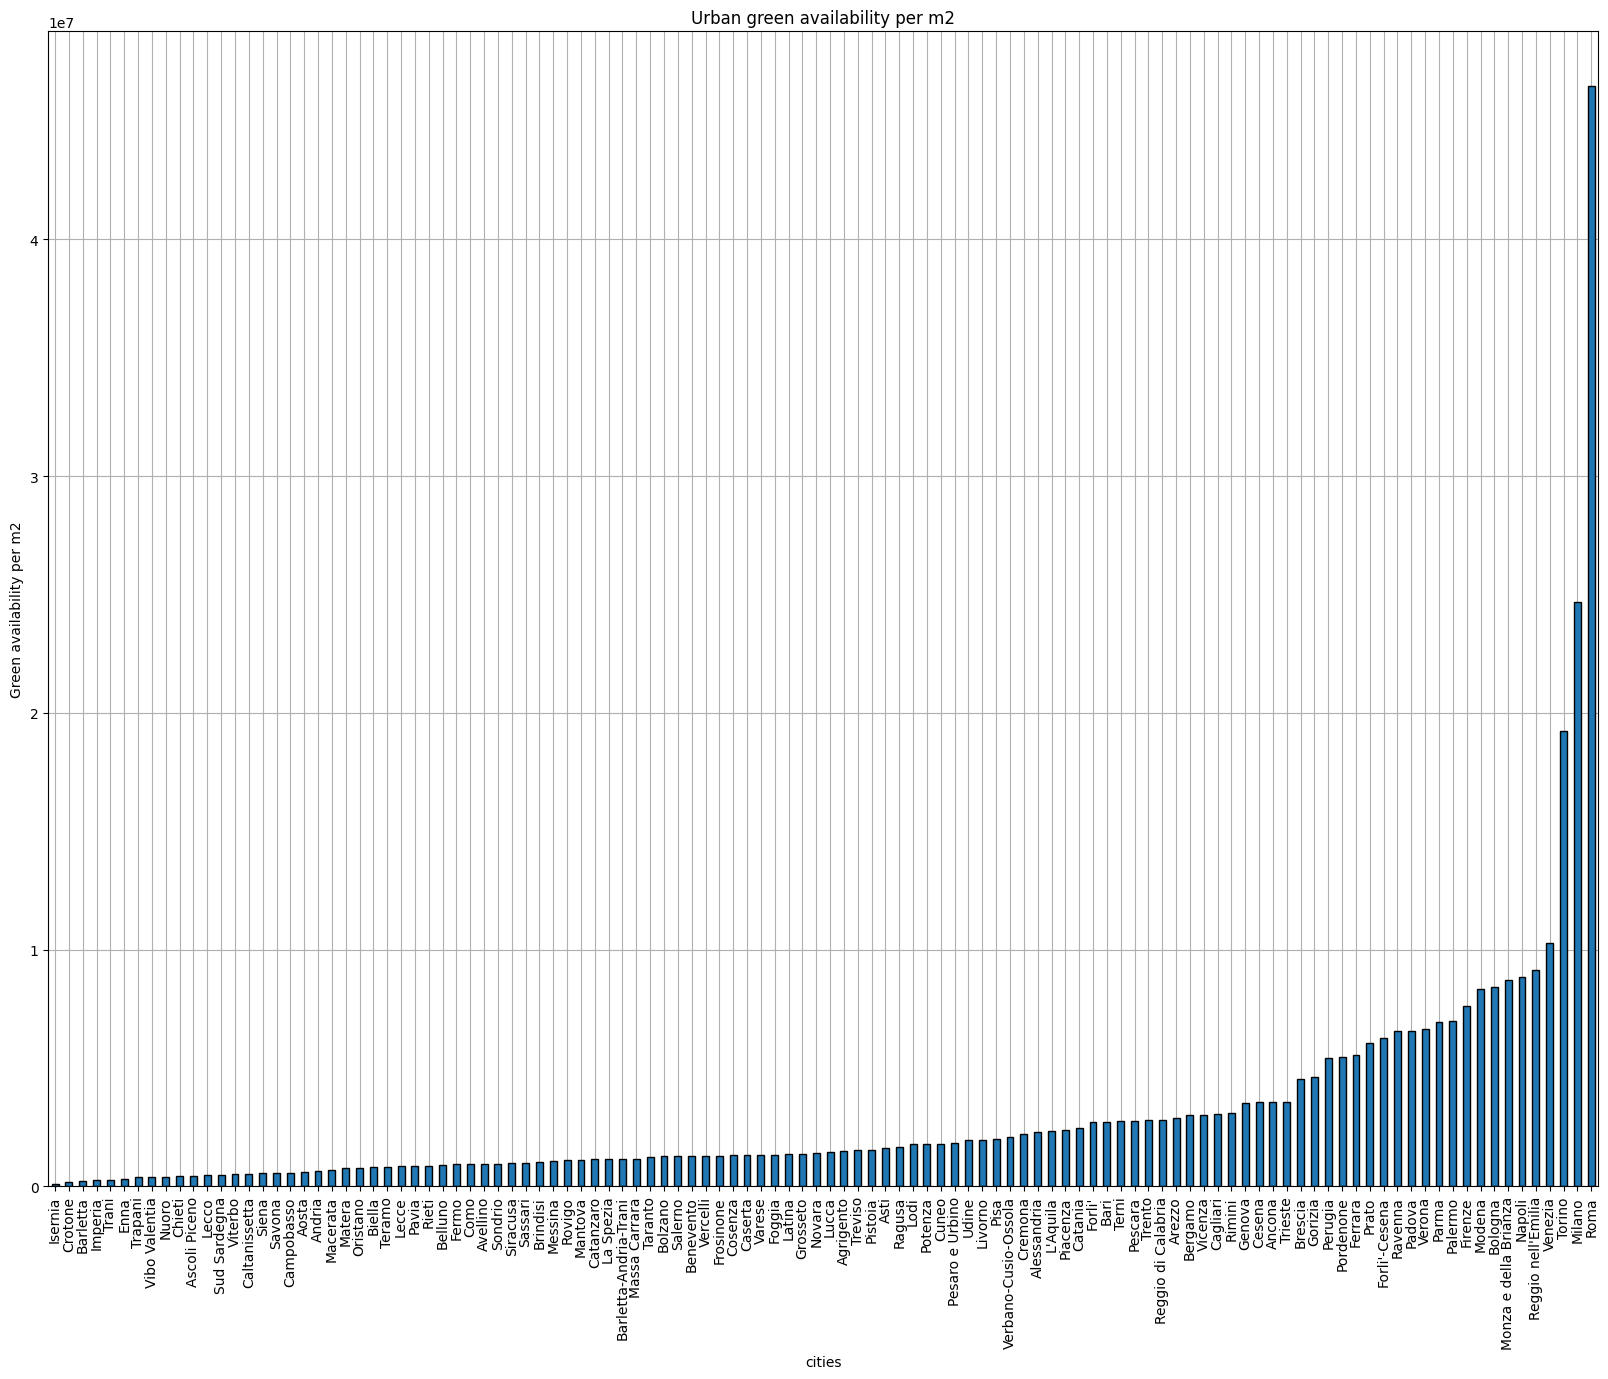

In [10]:
urban_green_availability_m2_df_select[year] = urban_green_availability_m2_df_select[year].astype(float)

fig, ax = plt.subplots(figsize=(20,15))
urban_green_availability_m2_df_select.sort_values(str(year)).plot.bar(x="cities", y=str(year), 
                                                                      edgecolor="k", 
                                                                      ax=ax, grid=True, legend=False)
ax.set_axisbelow(True)
ax.set_title("Urban green availability per m2")
ax.set_ylabel("Green availability per m2")

/tmp/ipykernel_1785/1246641371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban_green_area_m2_df_select[year] = urban_green_area_m2_df_select[year].astype(float)


Text(0, 0.5, 'Green area [m2]')

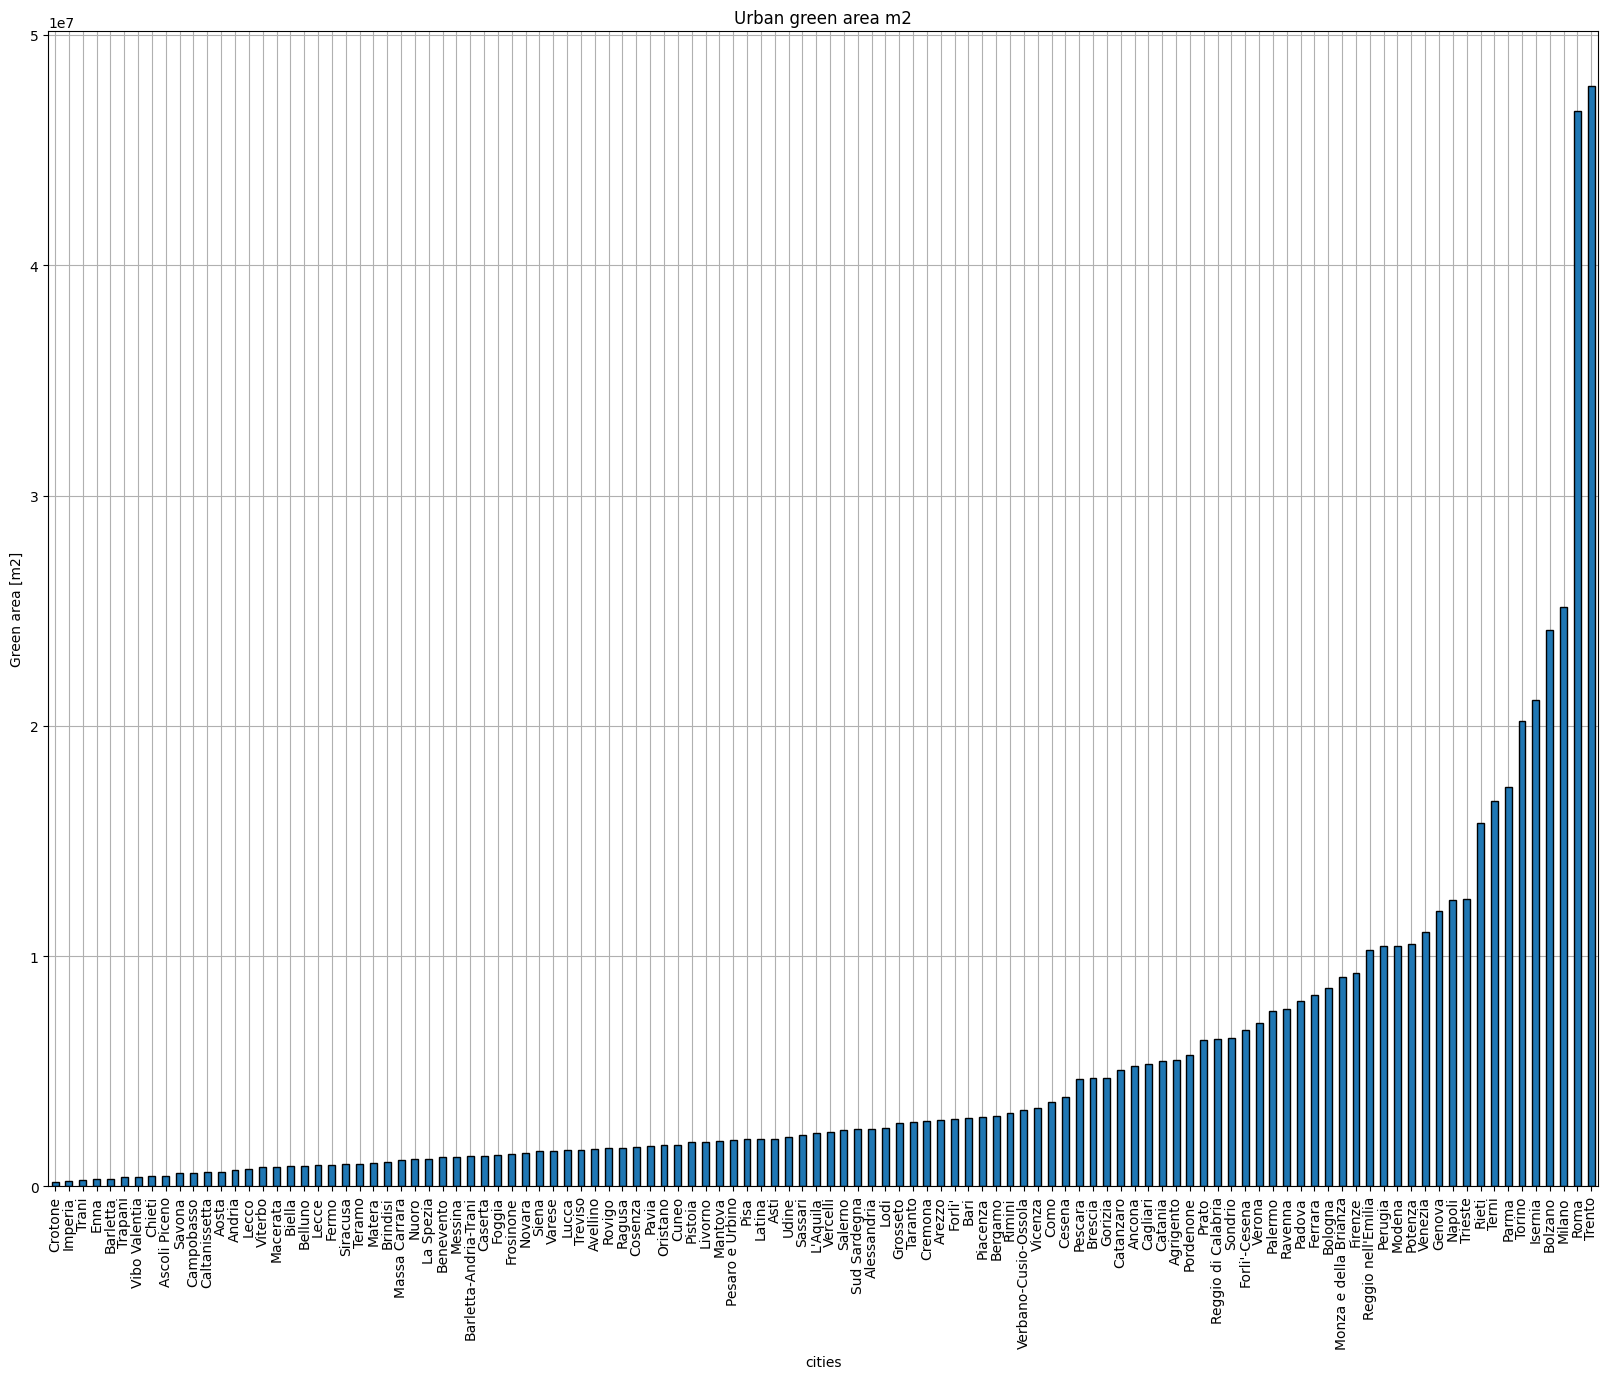

In [11]:
urban_green_area_m2_df_select[year] = urban_green_area_m2_df_select[year].astype(float)

fig, ax = plt.subplots(figsize=(20,15))
urban_green_area_m2_df_select.sort_values(str(year)).plot.bar(x="cities", y=str(year), 
                                                                      edgecolor="k", 
                                                                      ax=ax, grid=True, legend=False)

ax.set_axisbelow(True)
ax.set_title("Urban green area m2")
ax.set_ylabel("Green area [m2]")



## Crime dataset exploration

### Selecting crime data by year

In [12]:
crime_df_select = crime_df.loc[crime_df["year"]==int(year)]

### Crime categories (all Italy)
We plot the total number of crimes for each category in all italian cities for the specific year

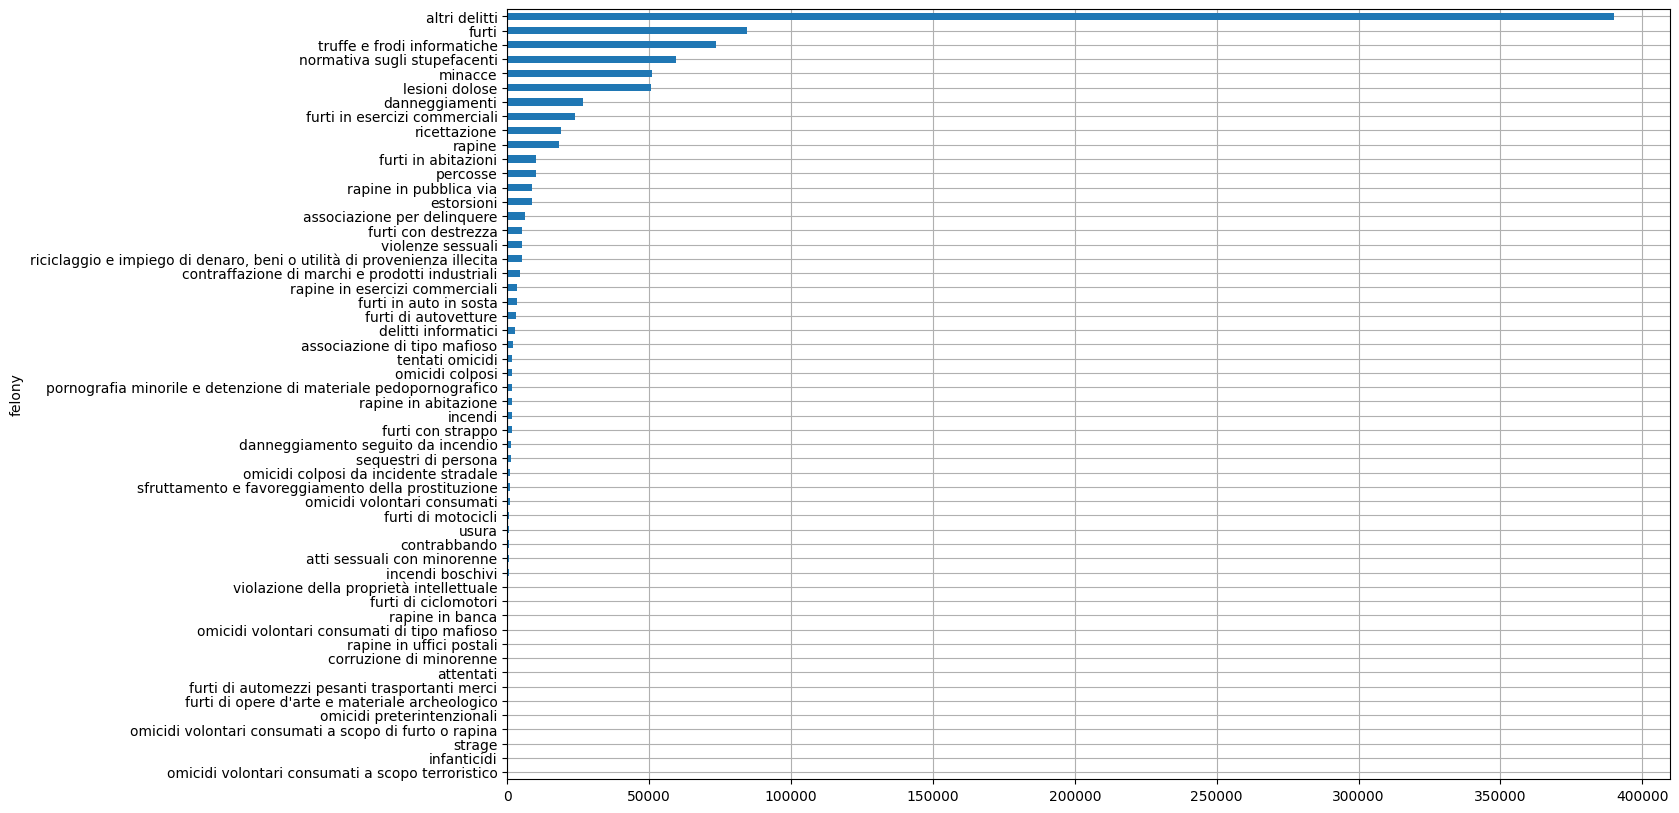

In [13]:

fig, ax = plt.subplots(figsize=(15,10))
crime_df_select.groupby("felony").sum()["count"].sort_values().iloc[:-1].plot.barh(ax=ax, grid=True)

ax.set_axisbelow(True)


### Total crime felony (by cities)
We plot the total number of crimes for all the italian cities for the specific year

Text(0, 0.5, 'Total number of felonies')

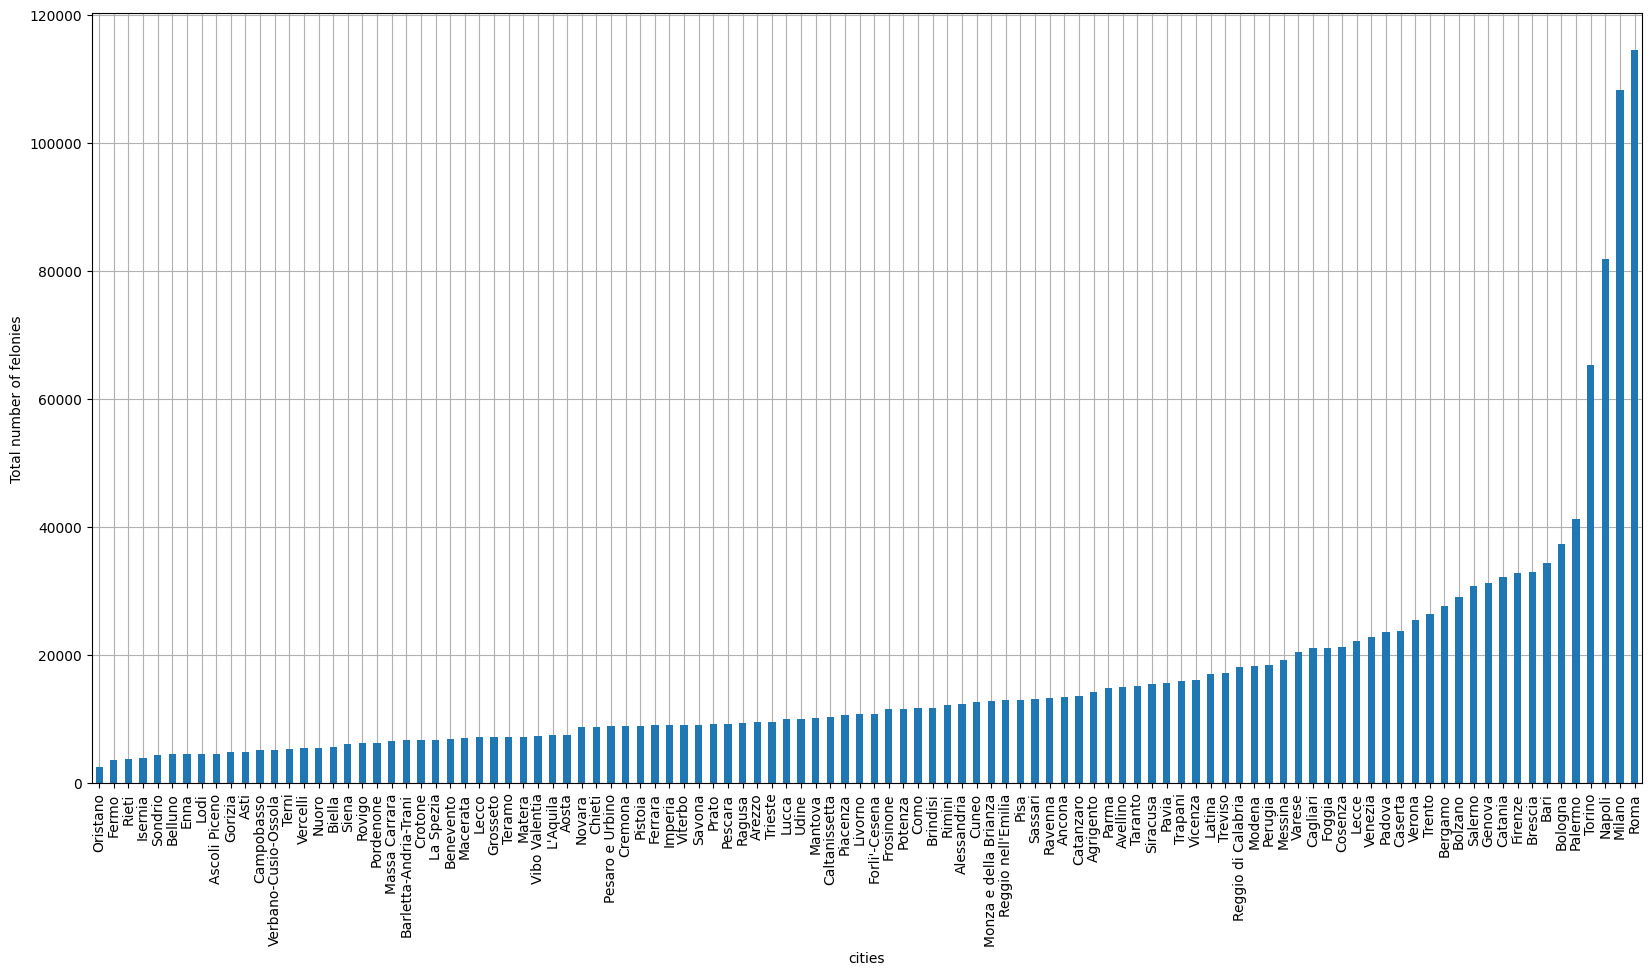

In [14]:

fig, ax = plt.subplots(figsize=(20,10))
crime_df_select.groupby("cities").sum()["count"].sort_values().plot.bar(ax=ax,
                                                                        grid=True)

ax.set_axisbelow(True)
ax.set_ylabel("Total number of felonies")

### Merging the crime data with the shp data

In [15]:
def make_gdf_for_felony(crime_df_select, felony, year):

    crime_df_select = crime_df_select[["cities", "count", "felony"]].loc[crime_df_select["felony"]==felony].groupby("cities").sum().reset_index()
    if(year == "2011" or year == "2012" or year == "2013" or year == "2014"):
        crime_select_gdf = gdf.merge(crime_df_select, left_on = "DEN_PROV", right_on = "cities")
    else:
        crime_select_gdf_temp1 = gdf.merge(crime_df_select, left_on = "DEN_PROV", right_on = "cities")
        crime_select_gdf_temp2 = gdf.merge(crime_df_select, left_on = "DEN_CM", right_on = "cities")
        crime_select_gdf = pd.concat([crime_select_gdf_temp1, crime_select_gdf_temp2])

    return crime_select_gdf


In [16]:
# total felonies for each city
crime_df_select_tot = crime_df_select[["cities", "count"]].groupby("cities").sum().reset_index()
if(year == "2011" or year == "2012" or year == "2013" or year == "2014"):
    crime_select_gdf_tot = gdf.merge(crime_df_select_tot, left_on = "DEN_PROV", right_on = "cities")
else:
    crime_select_gdf_tot_temp1 = gdf.merge(crime_df_select_tot, left_on = "DEN_PROV", right_on = "cities")
    crime_select_gdf_tot_temp2 = gdf.merge(crime_df_select_tot, left_on = "DEN_CM", right_on = "cities")
    crime_select_gdf_tot = pd.concat([crime_select_gdf_tot_temp1, crime_select_gdf_tot_temp2])


### Plot of the total crime distribution over Italy

[]

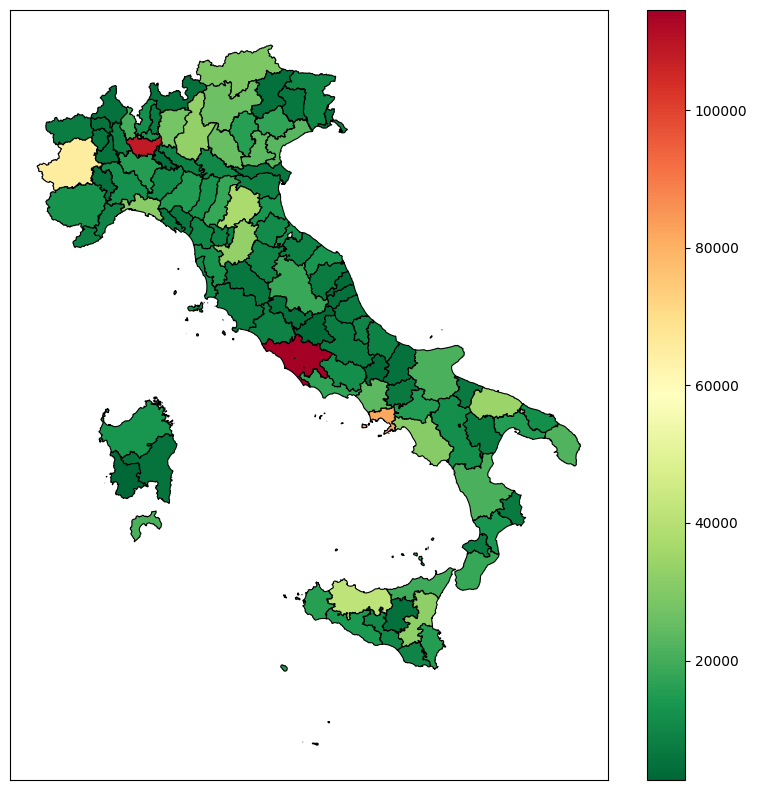

In [17]:
fig, ax = plt.subplots(figsize=(10,10))

crime_select_gdf_tot.plot(column="count", cmap="RdYlGn_r", linewidth=0.8, ax=ax, edgecolor='k', legend=True)

ax.set_title("")

ax.set_xticks([])
ax.set_yticks([])


### Plot of the specific felony distribution over Italy

[]

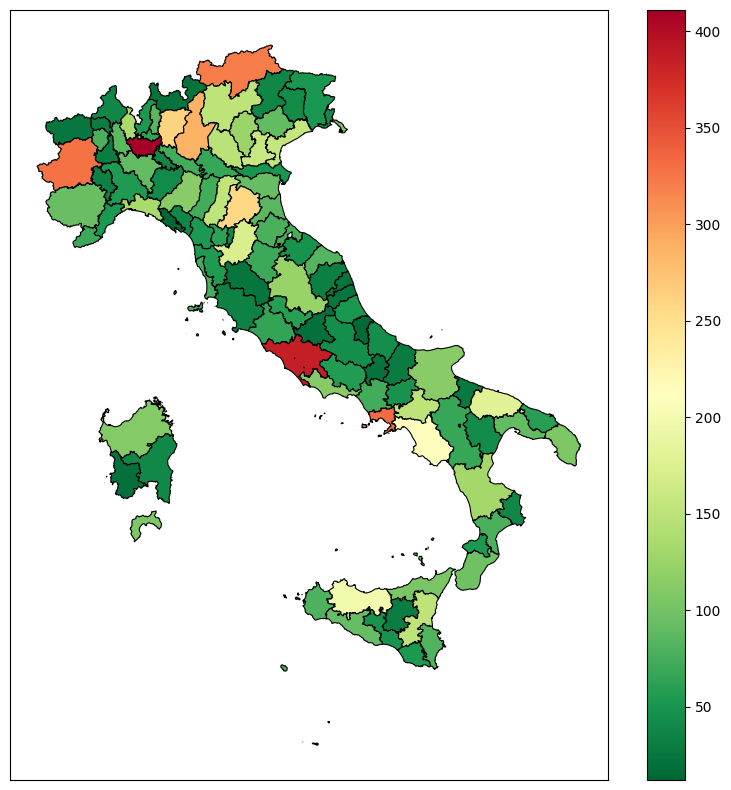

In [18]:
# specific felony count for each city
crime_select_gdf_1 = make_gdf_for_felony(crime_df_select, "percosse", year)

fig, ax = plt.subplots(figsize=(10,10))

crime_select_gdf_1.plot(column="count", cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='k', legend=True)

ax.set_title("")

ax.set_xticks([])
ax.set_yticks([])

### Comparison between park and crime data for a specific city for different years

We plot the values for the park and the crime for a specific city as function of the time (years). We can also look at the specific felony compared with the park presence for that city

In [117]:

def crime_park_city_comparison(city, park_df, crime_df, felony, normalization=True):

    park_df_city = park_df.loc[park_df["cities"]==city]
    crime_df_city = crime_df.loc[crime_df["cities"]==city]

    park_x = []
    park_y = []

    crime_x = []
    crime_y = []

    for year in park_df_city.columns:
        if(year!="cities"):

            park_x.append(year)
            park_y.append(park_df_city[str(year)].iloc[0])

            crime_x.append(year)
            if(felony == "tot"):
                crime_y.append(crime_df.loc[(crime_df["cities"]==city) & (crime_df["year"]==int(year))]["count"].sum())
            else:
                crime_y.append(crime_df.loc[(crime_df["cities"]==city) & (crime_df["felony"]==felony) & (crime_df["year"]==int(year))]["count"].sum())

    if(normalization):
        for i in range(len(park_y)):
            park_y[i] = (park_y[i]-min(park_y)) / (max(park_y)-min(park_y))
            crime_y[i] = (crime_y[i]-min(crime_y)) / (max(crime_y)-min(crime_y))
            
    fig, ax = plt.subplots()    

    ax.plot(park_x, park_y, c="g", marker="o", label="Park")
    ax.plot(crime_x, crime_y, c="r", marker="o", label="Crime")

    ax.set_yscale("log")
    ax.set_axisbelow(True)
    ax.set_xlabel("Anni")
    ax.set_ylabel("Conteggio Normalizzato")
    ax.grid()
    ax.legend()


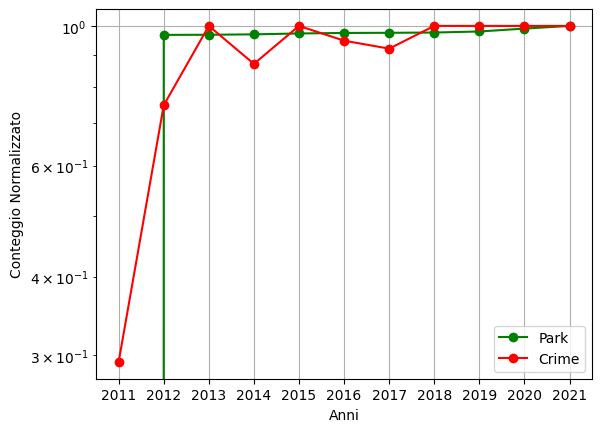

In [128]:
crime_park_city_comparison("Foggia", urban_green_availability_m2_per_inhabitant_df, crime_df, "furti", True)

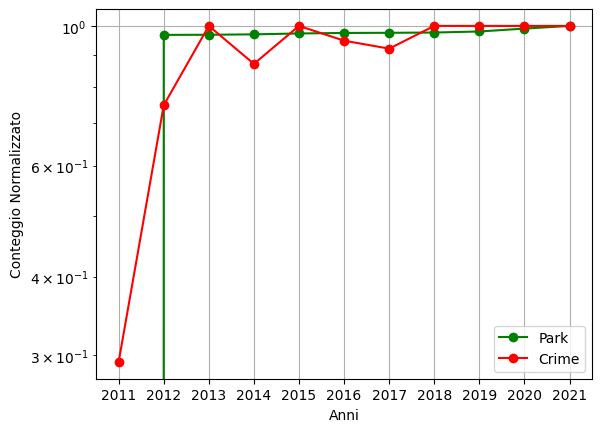

In [129]:
crime_park_city_comparison("Foggia", urban_green_availability_m2_per_inhabitant_df, crime_df, "furti")